# Necessay Inputs

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read csv data

In [14]:
df = pd.read_csv('epa_sea_level.csv')

# Plots and predictions 

In [31]:

def draw_plot():

    # 2. Create scatter plot Use matplotlib to create a scatter plot using the Year column as the x-axis 
    # and the CSIRO Adjusted Sea Level column as the y-axis.
    df.plot(kind = 'scatter', x ='Year', y = 'CSIRO Adjusted Sea Level', figsize = (9,5))



    # 3. Create first line of best fit 
    #  Use the linregress function from scipy.stats to get the slope and y-intercept of
    #  the line of best fit. Plot the line of best fit over the top of the scatter plot.
    #  Make the line go through the year 2050 to predict the sea level rise in 2050.
    
    # Get the slope and y-intercept for the entire dataset
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    
    # Create an array of years from the original data and for prediction to 2050
    years_extended = pd.Series(range(df['Year'].min(), 2051))
    
    # Calculate the predicted sea levels
    sea_levels_extended = slope * years_extended + intercept
    
    # Plot the first line of best fit
    plt.plot(years_extended, sea_levels_extended, color='red', label='Fit Line (All Data)')

    # 4. Create second line of best fit
    # Filter data from year 2000 onward
    df_recent = df[df['Year'] >= 2000]
    
    # Get the slope and y-intercept for the recent data
    slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    
    # Create an array of years from 2000 to 2050 for the second line
    years_recent_extended = pd.Series(range(2000, 2051))
    
    # Calculate the predicted sea levels for the recent data
    sea_levels_recent_extended = slope_recent * years_recent_extended + intercept_recent
    
    # Plot the second line of best fit
    plt.plot(years_recent_extended, sea_levels_recent_extended, color='green', label='Fit Line (2000 Onwards)')

    # 5. Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

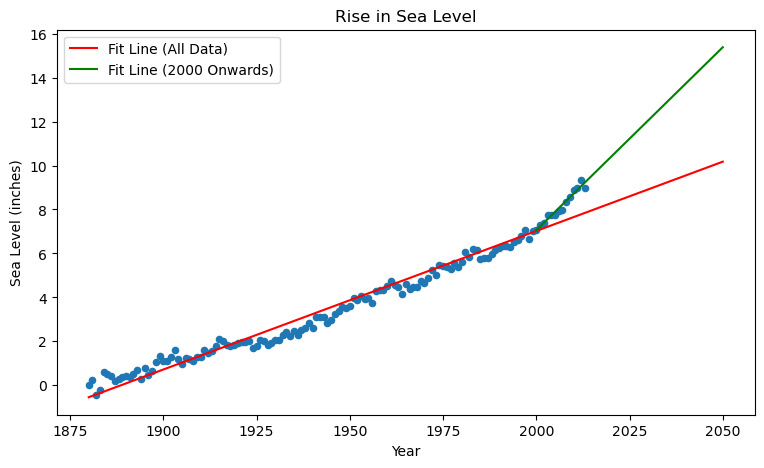

In [33]:
draw_plot()